In [1]:
%reset -f

In [2]:
from matplotlib.ticker import MultipleLocator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib.cm as cm
import numpy as np
from importlib import reload


import decid_package.my_functions as decid
import decid_package.my_plotfunctions as plotf

sns.set_style("white")  # or "white", etc.

from matplotlib import rcParams

rcParams.update({
    'axes.titlesize': 18,    # a bit bigger
    'axes.labelsize': 14,    # slightly larger
    'xtick.labelsize': 12,   # easier to read
    'ytick.labelsize': 12,
    'legend.fontsize': 14
})


In [3]:
df_trends = pd.read_csv("../outputs/df_all.csv")
df_trends['DateTime'] = pd.to_datetime(df_trends['DateTime'])

In [4]:
print(df_trends.columns)

Index(['DateTime', 'flat_flag', 'missing', 'gap_block', 'raw_signal',
       'smoothed_signal', 'daily_mean', 'detrended_daily_mean', 'short_trend',
       'detrended_short', 'long_trend', 'detrended_long',
       'short_trend_dday_diff', 'smoothed_signal_roll10d',
       'smoothed_signal_mean_D', 'smoothed_signal_min_D',
       'smoothed_signal_max_D', 'smoothed_signal_mean_W',
       'smoothed_signal_min_W', 'smoothed_signal_max_W',
       'smoothed_signal_mean_M', 'smoothed_signal_min_M',
       'smoothed_signal_max_M', 'Days_since_start', 'Period', 'Day_of_Period',
       'smoothed_signal_pct_global', 'smoothed_signal_pct_period',
       'smoothed_signal_mean_D_pct_global',
       'smoothed_signal_mean_D_pct_period',
       'smoothed_signal_mean_W_pct_global',
       'smoothed_signal_mean_W_pct_period',
       'smoothed_signal_mean_M_pct_global',
       'smoothed_signal_mean_M_pct_period',
       'smoothed_signal_roll10d_pct_global',
       'smoothed_signal_roll10d_pct_period', 'Se

# MDS & DRG

This dataset — combining MDS, DGR, and sap flow — lets you extract meaningful physiological and ecological insights about your tree. Here’s what you can do with it:

1️⃣ Understand daily water–growth dynamics
MDS (Maximum Daily Shrinkage) reflects water deficit in the stem during the day.
Large MDS → strong transpiration, low stem water content, or dry conditions.
DGR (Daily Growth Rate) shows net cell expansion/growth, mostly happening overnight/early morning.
Sap flow indicates water transport.

Applications:
Correlate MDS and sap flow: see if large transpiration drives shrinkage.
Correlate DGR and sap flow: see if growth is limited by water availability.

2️⃣ Detect stress events
Sudden MDS spikes with low DGR → water stress.
Prolonged low DGR despite adequate sap flow → possible physiological or environmental limitations.

3️⃣ Track phenology
Compare flush or leaf-drop events with changes in DGR/MDS.
Example: leaf flush may temporarily increase sap flow or reduce MDS due to increased transpiration.

4️⃣ Seasonal analysis
Aggregate monthly or seasonal means of MDS, DGR, sap flow.
Compare wet vs dry seasons:
Wet season → lower MDS, higher DGR?
Dry season → higher MDS, reduced growth?

5️⃣ Cross-correlations & lag analysis
Examine lags between sap flow and stem increment:
Does water uptake precede growth (positive lag)?
Do long-term trends in stem expansion lag rainfall?

6️⃣ Model or predict growth under climate scenarios
Combine climate data (temperature, insolation, rainfall) with DGR and MDS.
Can develop a mechanistic or empirical model of water-limited growth.

In short:
MDS → short-term water dynamics
DGR → net growth
Sap flow → water supply


Compare them to diagnose stress, understand phenology, and explore seasonal patterns.
If you want, I can make a visual dashboard combining all three with seasonal shading, highlighting wet/dry periods and leaf flush/drop events — it gives an at-a-glance understanding of your tree’s physiology.

In [5]:
reload(decid)

<module 'decid_package.my_functions' from 'c:\\Users\\decle\\OneDrive - UGent\\_Vakantiejob_Rune_Declercq\\scripts\\decid_package\\my_functions.py'>

In [6]:
df_natkon = df_trends[df_trends['Sensor'] == 'Natkon'].set_index('DateTime').dropna(axis=1, how='all')
df_sapflow = df_trends[df_trends['Sensor'] == 'Sap Flow'].set_index('DateTime').dropna(axis=1, how='all')

df_natkon_metrics, _ = decid.compute_metrics(df_natkon)

# df_natkon_metrics

In [7]:
# fig, axes = plt.subplots(3,1, figsize=(14,10), sharex=True)

# # --- Top: MDS and pre-dawn TWD ---
# axes[0].plot(df_natkon_metrics['date'], df_natkon_metrics['MDS'], label='MDS', color='tab:blue')
# axes[0].plot(df_natkon_metrics['date'], df_natkon_metrics['pre_dawn_TWD'], label='Pre-dawn TWD', color='tab:cyan', linestyle='--')
# axes[0].set_ylabel('Stem shrinkage / TWD')
# axes[0].set_title('Tree Metrics: MDS & Pre-dawn TWD')
# axes[0].legend()
# axes[0].grid(True)

# # --- Middle: DGR ---
# axes[1].plot(df_natkon_metrics['date'], df_natkon_metrics['DGR'], label='DGR', color='tab:blue')
# axes[1].axhline(0, color='gray', linestyle='--', alpha=0.7)
# axes[1].set_ylabel('Daily Growth Rate')
# axes[1].set_title('Daily Growth Rate (DGR)')
# axes[1].grid(True)

# # --- Bottom: Sap flow ---
# axes[2].plot(df_sapflow.index, df_sapflow['smoothed_signal'], label='Sap Flow', color='tab:green')
# axes[2].set_ylabel('Sap Flow (units)')
# axes[2].set_title('Sap Flow')
# axes[2].grid(True)

# plt.xlabel('Date')
# plt.tight_layout()
# plt.show()


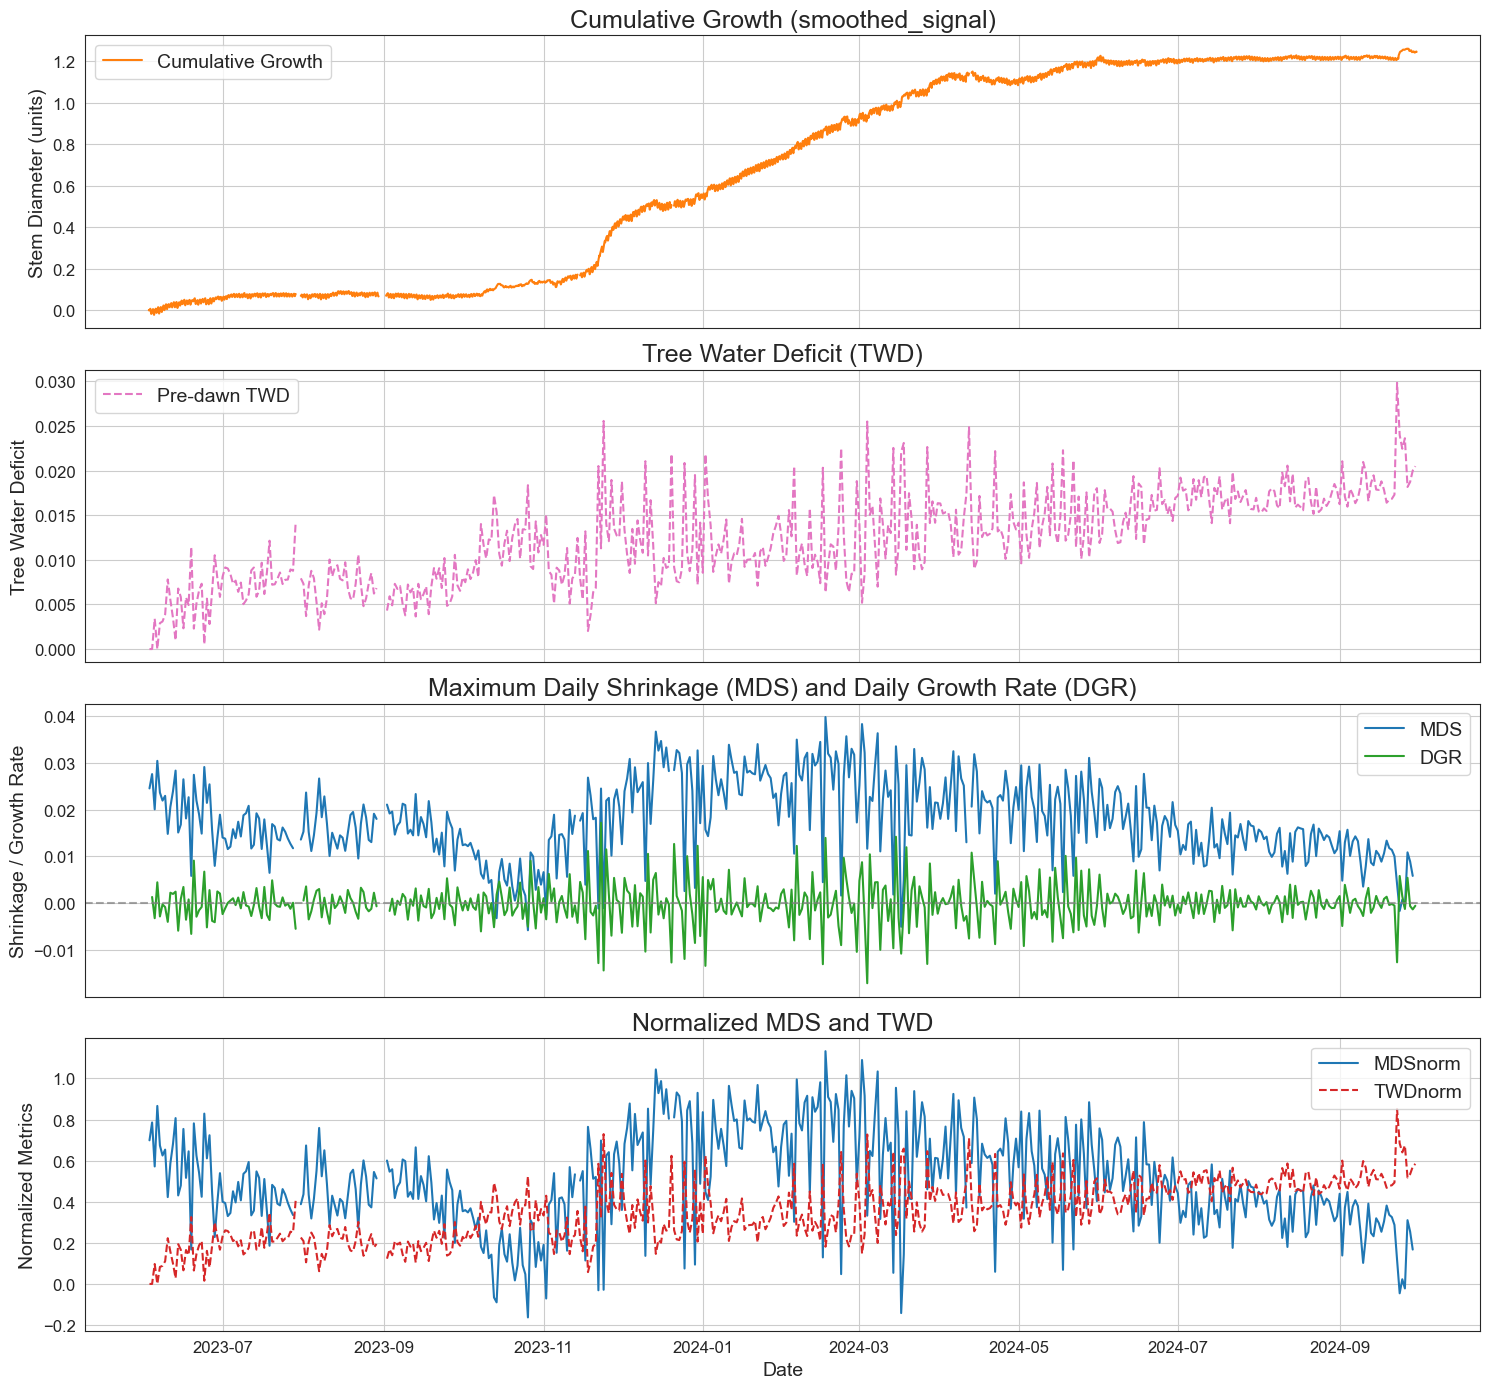

In [8]:
import matplotlib.pyplot as plt

# Use df_natkon_metrics and the original smoothed_signal
# Make sure df_natkon has smoothed_signal
df = df_natkon.copy()  

fig, axes = plt.subplots(4, 1, figsize=(15, 14), sharex=True)

# --- Panel 1: Cumulative growth ---
axes[0].plot(df.index, df['smoothed_signal'], color='tab:orange', label='Cumulative Growth')
axes[0].set_ylabel('Stem Diameter (units)')
axes[0].set_title('Cumulative Growth (smoothed_signal)')
axes[0].legend()
axes[0].grid(True)

# --- Panel 2: TWD ---
# axes[1].plot(df_natkon_metrics.index, df_natkon_metrics['TWD'], color='tab:red', label='TWD')
axes[1].plot(df_natkon_metrics['date'], df_natkon_metrics['pre_dawn_TWD'], color='tab:pink', linestyle='--', label='Pre-dawn TWD')
axes[1].set_ylabel('Tree Water Deficit')
axes[1].set_title('Tree Water Deficit (TWD)')
axes[1].legend()
axes[1].grid(True)

# --- Panel 3: MDS ---
axes[2].plot(df_natkon_metrics['date'], df_natkon_metrics['MDS'], color='tab:blue', label='MDS')
axes[2].plot(df_natkon_metrics['date'], df_natkon_metrics['DGR'], color='tab:green', label='DGR')
axes[2].axhline(0, color='gray', linestyle='--', alpha=0.7)
axes[2].set_ylabel('Shrinkage / Growth Rate')
axes[2].set_title('Maximum Daily Shrinkage (MDS) and Daily Growth Rate (DGR)')
axes[2].legend()
axes[2].grid(True)

# --- Panel 4 (optional): Normalized metrics ---
axes[3].plot(df_natkon_metrics['date'], df_natkon_metrics['MDSnorm'], color='tab:blue', linestyle='-', label='MDSnorm')
axes[3].plot(df_natkon_metrics['date'], df_natkon_metrics['TWDnorm'], color='tab:red', linestyle='--', label='TWDnorm')
axes[3].set_ylabel('Normalized Metrics')
axes[3].set_title('Normalized MDS and TWD')
axes[3].legend()
axes[3].grid(True)

# --- X-axis ---
plt.xlabel('Date')
plt.tight_layout()
plt.show()
